# Multivariate Exploratory analysis

In this notebook, the purpose is to investigate meaningful relationships between target variable (fraud) and variables such as Age, income, etc....

## Data importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from pathlib import Path
DATADIR= Path("/workspaces/fraud-detection-BAF-Dataset-Suite-/FraudDataset")
data_dir =DATADIR
if not data_dir.exists():
    raise FileNotFoundError(f"Data directory not found: {data_dir}")
extension = "csv"  # Change to "csv" if needed
data_paths = [str(p) for p in sorted(data_dir.glob(f"*.{extension}"))]
data_paths[0]
dataset=pd.read_csv("engineered_fraud_dataset.csv")
dataset.head(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,intended_balcon_amount_cluster,has_other_cards_binary,bank_months_count_binary,prev_address_months_count_binary,current_address_months_count_binary,customer_profile,phone_home_valid_binary,phone_mobile_valid_binary,phone_home_mobile_valid,days_since_request_binned
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,2,no_card_holder,financial_credibility,no_previous_address_available,current_address_available,no_card_holder_financial_credibility_no_previo...,invalid_home,valid_mobile,invalid_home_valid_mobile,Recent
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,missing_cluster,no_card_holder,financial_credibility,no_previous_address_available,current_address_available,no_card_holder_financial_credibility_no_previo...,valid_home,valid_mobile,valid_home_valid_mobile,Recent
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,missing_cluster,no_card_holder,financial_credibility,previous_address_available,current_address_available,no_card_holder_financial_credibility_previous_...,invalid_home,valid_mobile,invalid_home_valid_mobile,Recent


In [3]:
dataset["intended_balcon_amount_cluster"].value_counts(normalize=True)*100

intended_balcon_amount_cluster
missing_cluster    74.2523
1                  13.0001
0                  10.8516
2                   1.8960
Name: proportion, dtype: float64

Visualise the distribution of the target variable as a reference

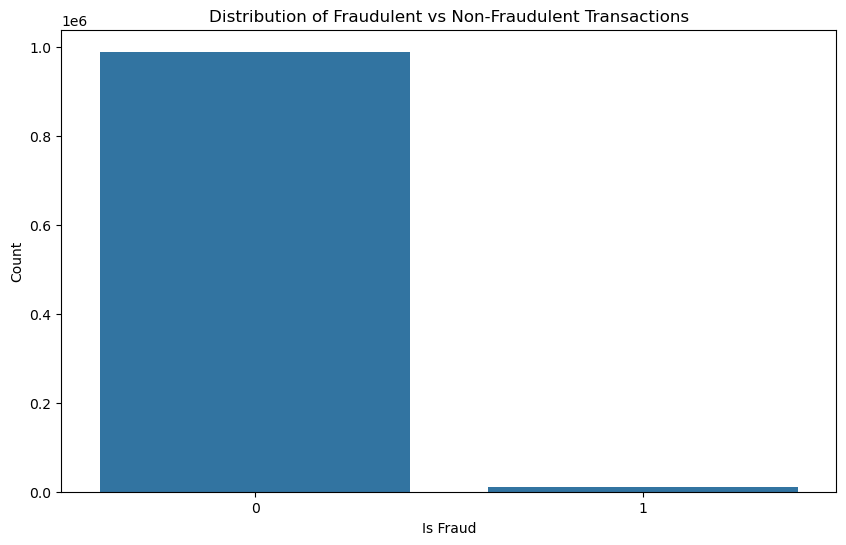

fraud_bool
0    98.8971
1     1.1029
Name: proportion, dtype: float64

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fraud_bool', data=dataset)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()
dataset['fraud_bool'].value_counts(normalize=True)*100

## Exploratory analysis of continuous variables

###

### days_since_request

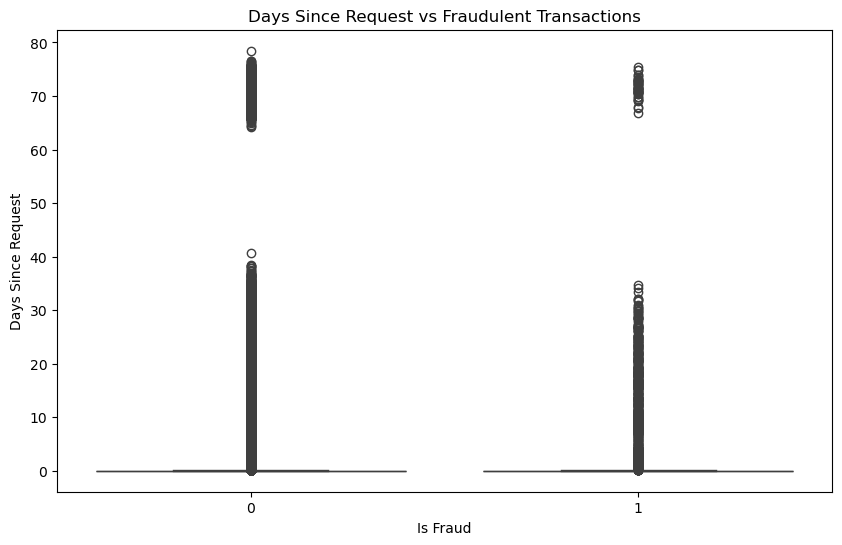

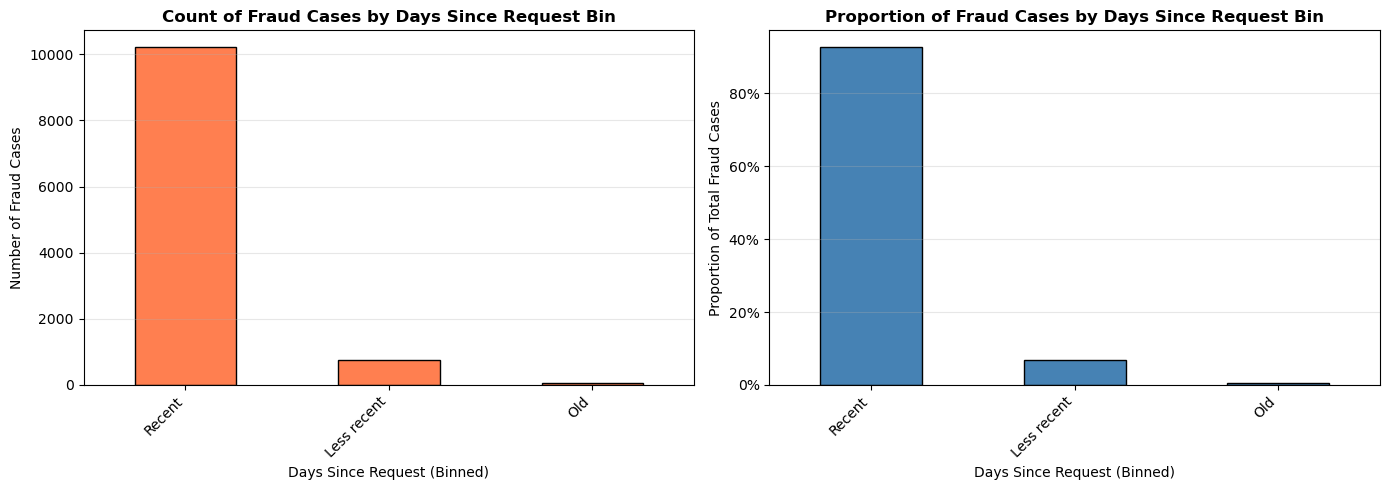


=== Fraud Cases Distribution by Days Since Request Bin ===
        Bin  Count  Proportion  Percentage
     Recent  10214    0.926104       92.61
Less recent    767    0.069544        6.95
        Old     48    0.004352        0.44

=== Non-Fraud Cases Distribution by Days Since Request Bin ===
        Bin  Count  Proportion  Percentage
     Recent 921953    0.932235       93.22
Less recent  63350    0.064056        6.41
        Old   3668    0.003709        0.37


In [4]:
# Create a figure between (X) days_since_request and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='days_since_request', data=dataset)
plt.title('Days Since Request vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Days Since Request')
plt.show()

# Create a discretized version of days_since_request by binning into 3 bins: 'Recent' (0-2) days, 'Less recent' (2.01-45) days, 'old' (45+ days)
dataset['days_since_request_binned'] = dataset['days_since_request'].copy()
dataset['days_since_request_binned'] = pd.cut(dataset['days_since_request_binned'], bins=[-1, 2, 45, np.inf], labels=['Recent', 'Less recent', 'Old'])
# Filter for fraud cases only (fraud_bool==1)
fraud_cases = dataset[dataset['fraud_bool'] == 1]
non_fraud_cases = dataset[dataset['fraud_bool'] == 0]
# Count fraud cases in each days_since_request_binned category
fraud_by_bin = fraud_cases['days_since_request_binned'].value_counts().sort_index()
non_fraud_by_bin = non_fraud_cases['days_since_request_binned'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin = fraud_by_bin / fraud_by_bin.sum()
non_fraud_by_bin_proportions = non_fraud_by_bin / non_fraud_by_bin.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by Days Since Request Bin', fontsize=12, fontweight='bold')
ax1.set_xlabel('Days Since Request (Binned)')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Days Since Request Bin', fontsize=12, fontweight='bold')
ax2.set_xlabel('Days Since Request (Binned)')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by Days Since Request Bin ===")
summary_df_fraud = pd.DataFrame({
    'Bin': fraud_by_bin.index,
    'Count': fraud_by_bin.values,
    'Proportion': fraud_proportions_by_bin.values,
    'Percentage': (fraud_proportions_by_bin.values * 100).round(2)
})
print(summary_df_fraud.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Days Since Request Bin ===")
summary_df_non_fraud = pd.DataFrame({
    'Bin': non_fraud_by_bin.index,
    'Count': non_fraud_by_bin.values,
    'Proportion': non_fraud_by_bin_proportions.values,
    'Percentage': (non_fraud_by_bin_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud.to_string(index=False))

**Inference** These distributions are very similar across classes: each bin takes roughly the same share of fraud and non‑fraud. That already suggests days_since_request (with these three bins) is weakly informative at best.

### (logit) name_email_similarity

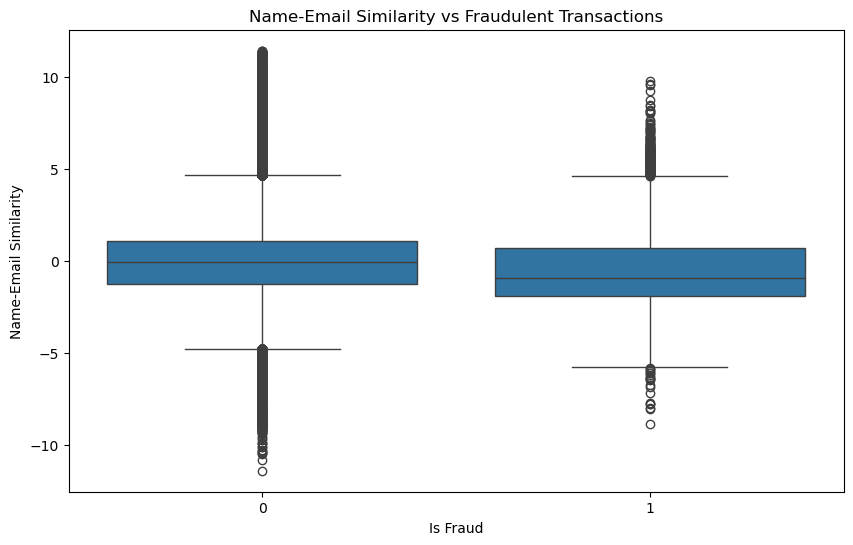

In [5]:
# Create a figure between (X) (logit) name e-mail similarity and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='logit_name_email_similarity', data=dataset)
plt.title('Name-Email Similarity vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Name-Email Similarity')
plt.show()


**Slight** indication that the less similarity => the more chances to be fraud.

### customer age

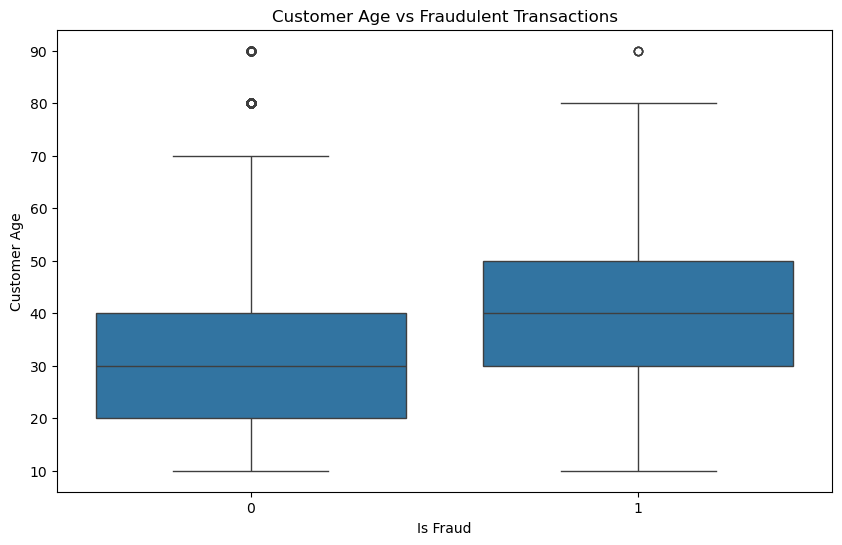

In [6]:
# Create a figure between (X) customer_age and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='customer_age', data=dataset)
plt.title('Customer Age vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Customer Age')
plt.show()


**Slightly** positive relationship by the means of that until age 30-35 it seems that there is less fraud detection rate but ages>35 indicate more chances for fraud detection.

### zip_count_4w

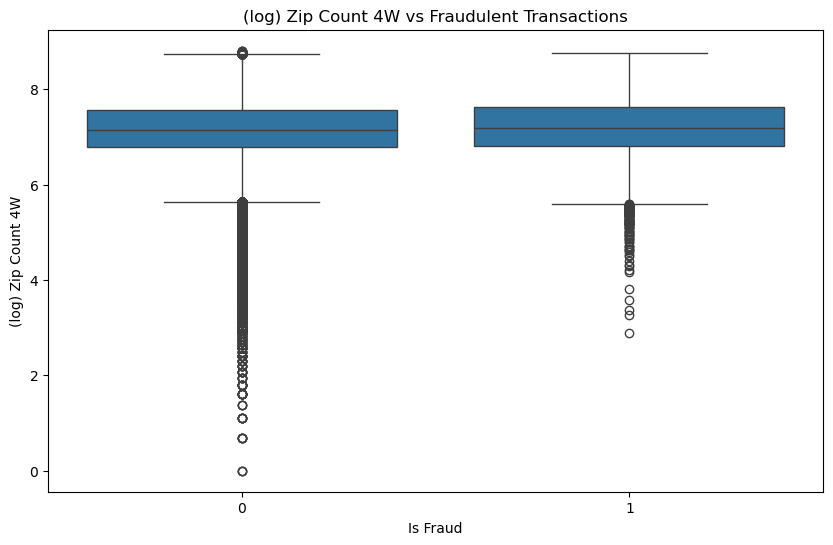

In [7]:
# Create a figure between (X) zip_count_4w and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='log_zip_count_4w', data=dataset)
plt.title('(log) Zip Count 4W vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('(log) Zip Count 4W')
plt.show()


**Not important distinction** for the zip_count_4w cases with fraud detection.

### Velocity 6h, 24h, 4w

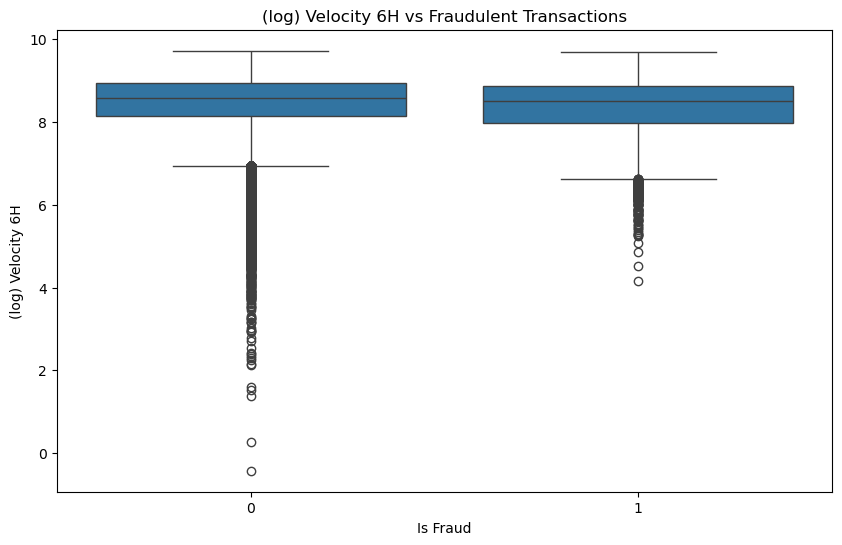

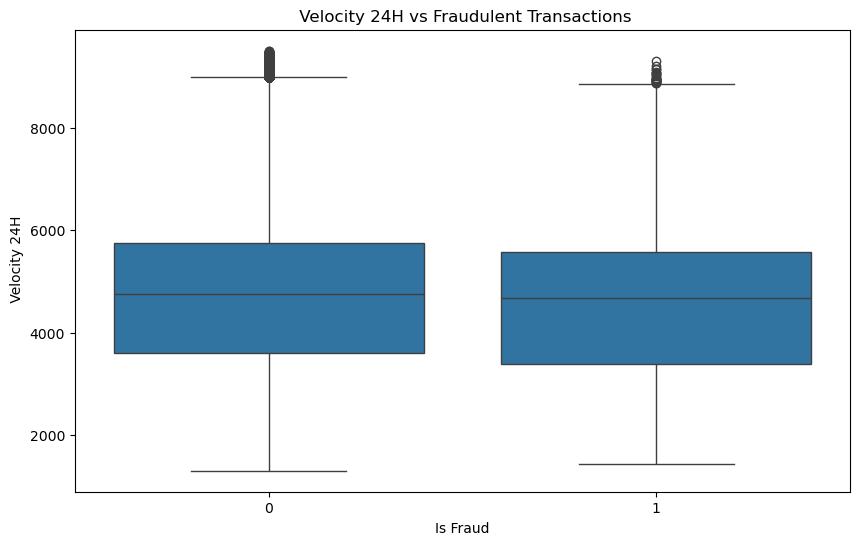

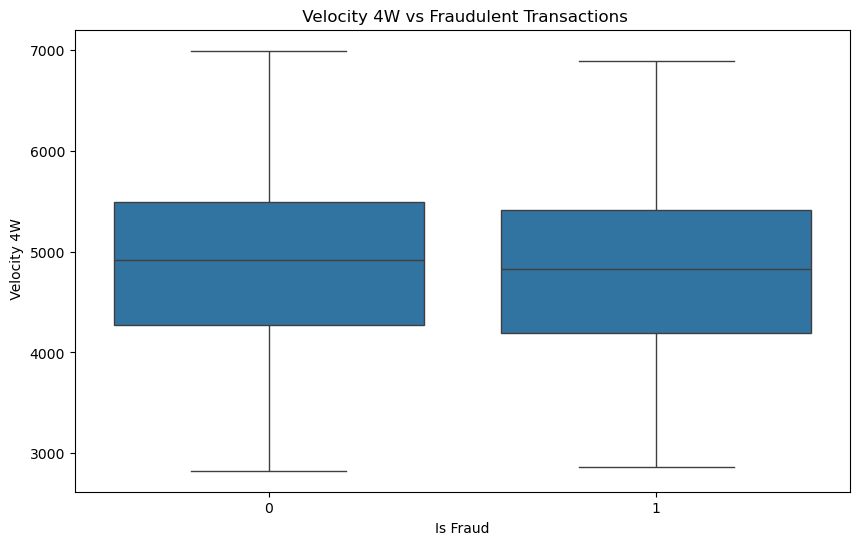

In [8]:
# Create a figure between (X) velocity_6h and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='log_velocity_6h', data=dataset)
plt.title('(log) Velocity 6H vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('(log) Velocity 6H')
plt.show()

# Create a figure between (X) velocity_24h and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='velocity_24h', data=dataset)
plt.title(' Velocity 24H vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel(' Velocity 24H')
plt.show()

# Create a figure between (X) velocity_4w and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='velocity_4w', data=dataset)
plt.title(' Velocity 4W vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel(' Velocity 4W')
plt.show()


**Inference** it does not seem an important relationship between velocity of any duration and fraud detection.

### bank_branch_count_8w

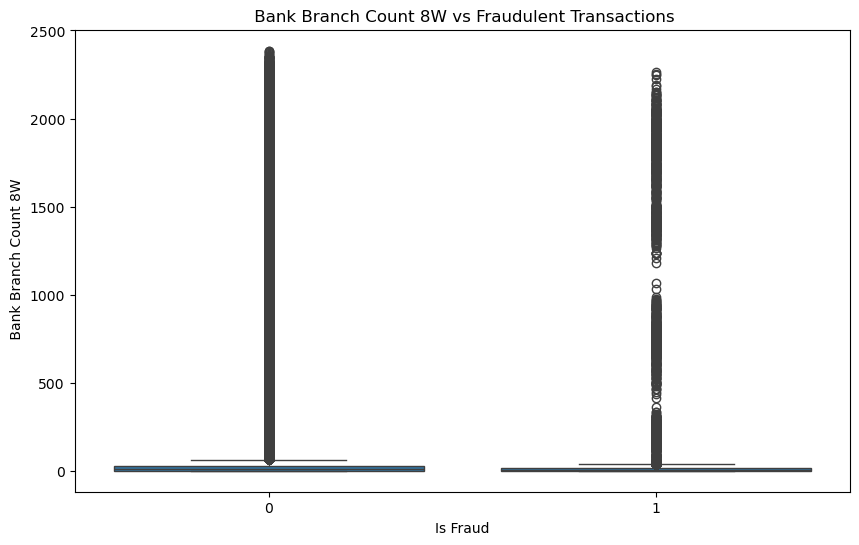

In [9]:
# Create a figure between (X) bank_branch_count_8w and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='bank_branch_count_8w', data=dataset)
plt.title(' Bank Branch Count 8W vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel(' Bank Branch Count 8W')
plt.show()


**Inference:** Not important relationship between number of accounts on the same branch in last 8 weeks and fraud proportion.

### date_of_birth_distinct_emails_4w

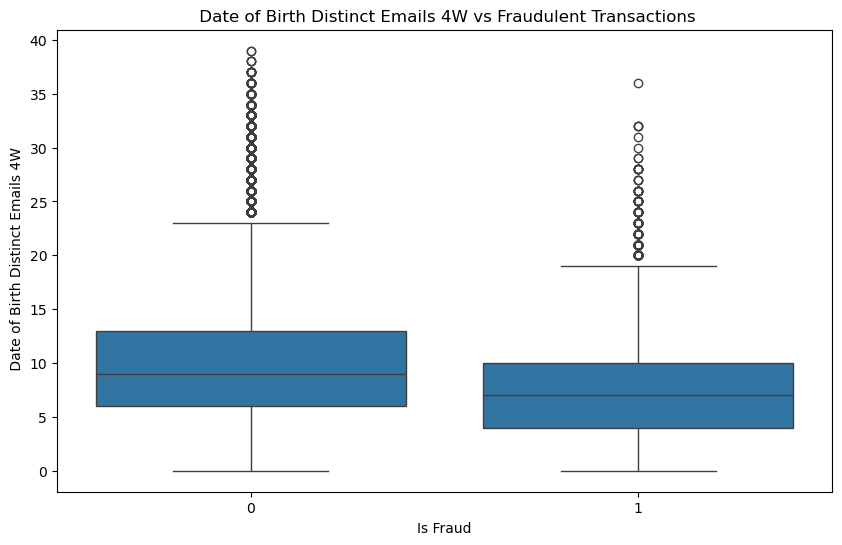

In [10]:
# Create a figure between (X) date_of_birth_distinct_emails_4w and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='date_of_birth_distinct_emails_4w', data=dataset)
plt.title(' Date of Birth Distinct Emails 4W vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel(' Date of Birth Distinct Emails 4W')
plt.show()


**Inference**: It seems that the less distinct emails in the last 4 weeks, having the same date of birth,the more chances to be fraud. This is translated by the means of that when the distinct_emails are either 0 or 1 such cases corresponding to unique identity clients.Here, apart from some outliers in case of fraud (fraud_bool==1), little differentiation in median distinct emails having the same data birth between fraud and non-fraud.

### credit_risk_score

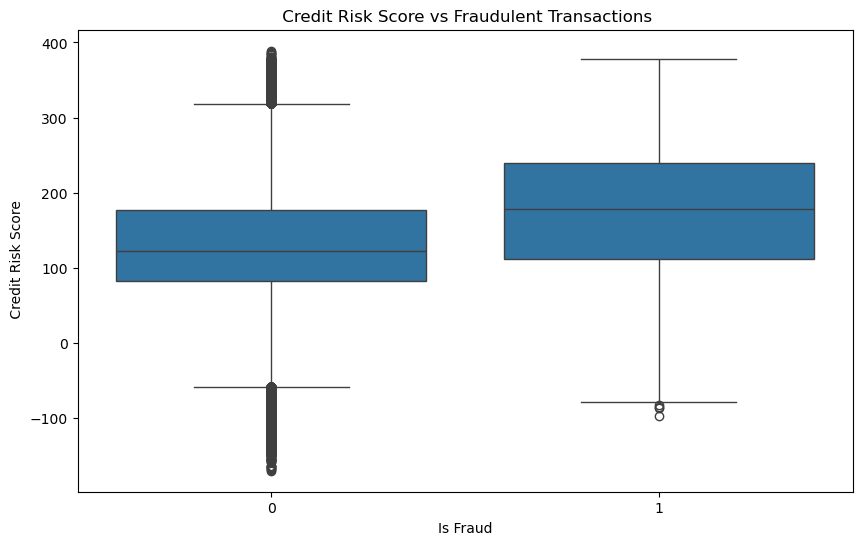

In [11]:
# Create a figure between (X) credit_risk_score and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='credit_risk_score', data=dataset)
plt.title(' Credit Risk Score vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel(' Credit Risk Score')
plt.show()


**Inference**: It seems that the higher risk score for a client, the higher chance to be fraud. **Improtant variable**. Also, it seems that we can preserve it as a continous for inference

### log_session_length_in_minutes

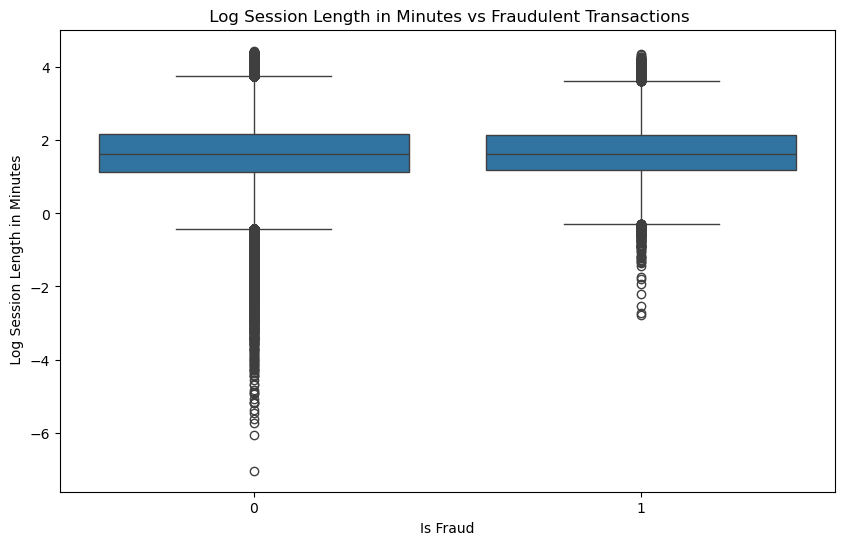

In [12]:
# Create a figure between (X) log_session_length_in_minutes and fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='log_session_length_in_minutes', data=dataset)
plt.title(' Log Session Length in Minutes vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel(' Log Session Length in Minutes')
plt.show()

**Not improtant relationship** since across range of fraud cases regarding session length in minutes, there is not an apparent separation between fraud and non fraud cases.

### name_email_similarity

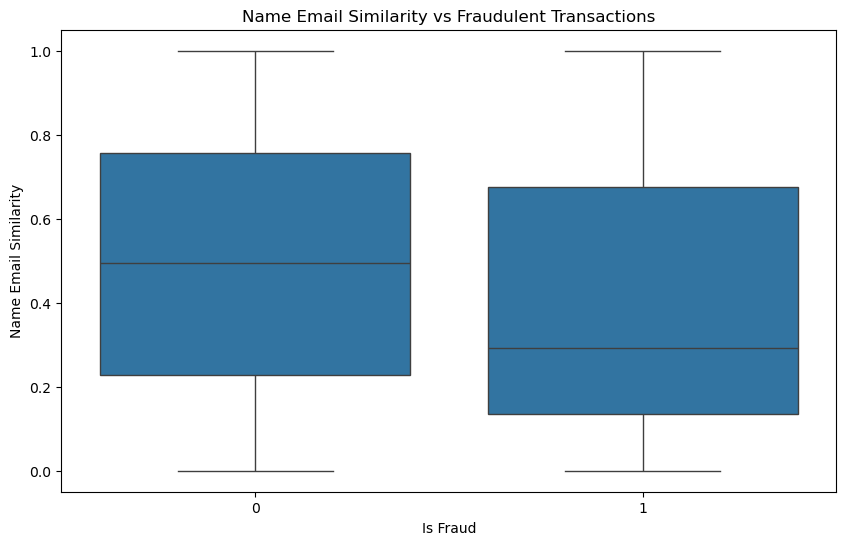

In [13]:
# Visualisation of boxplot of name_email_similarity per fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='name_email_similarity', data=dataset)
plt.title('Name Email Similarity vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Name Email Similarity')
plt.show()

### proposed_credit_limit

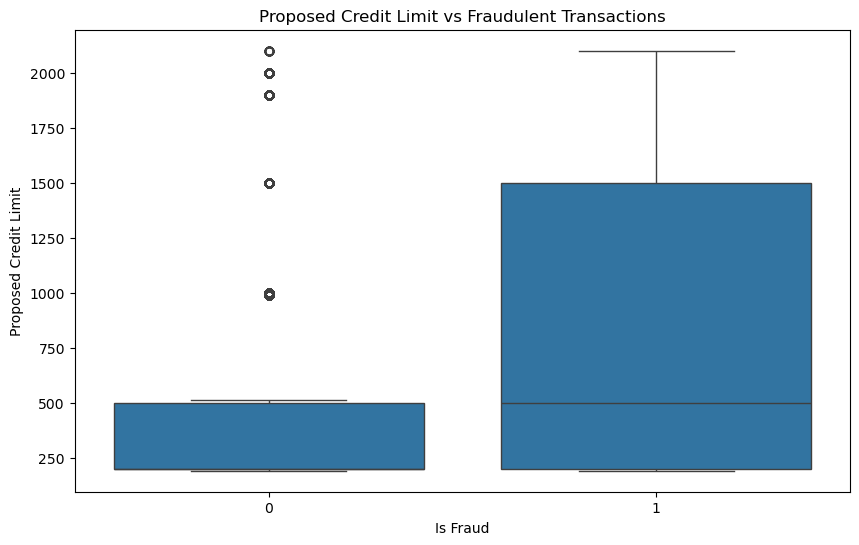

In [14]:
# Visualisation of boxplot of name_email_similarity per fraud_bool
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='proposed_credit_limit', data=dataset)
plt.title('Proposed Credit Limit vs Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Proposed Credit Limit')
plt.show()

**Important** relationship since the higher the proposed credit limit the more chances to be fraud. Perhaps, the fraud users tend to request higher limits to their own accounts.

### Inference in continuous variables

**Important relationships**

1) date_of_birth_distinct_emails_8w
2) credit_risk_score
3) Customer age
4) logit_name_email_similarity
5) Proposed credit limit

## Exploratory analysis of categorical/ordinal variables

In [15]:
dataset.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,intended_balcon_amount_cluster,has_other_cards_binary,bank_months_count_binary,prev_address_months_count_binary,current_address_months_count_binary,customer_profile,phone_home_valid_binary,phone_mobile_valid_binary,phone_home_mobile_valid,days_since_request_binned
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,2,no_card_holder,financial_credibility,no_previous_address_available,current_address_available,no_card_holder_financial_credibility_no_previo...,invalid_home,valid_mobile,invalid_home_valid_mobile,Recent
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,missing_cluster,no_card_holder,financial_credibility,no_previous_address_available,current_address_available,no_card_holder_financial_credibility_no_previo...,valid_home,valid_mobile,valid_home_valid_mobile,Recent


### payment_type

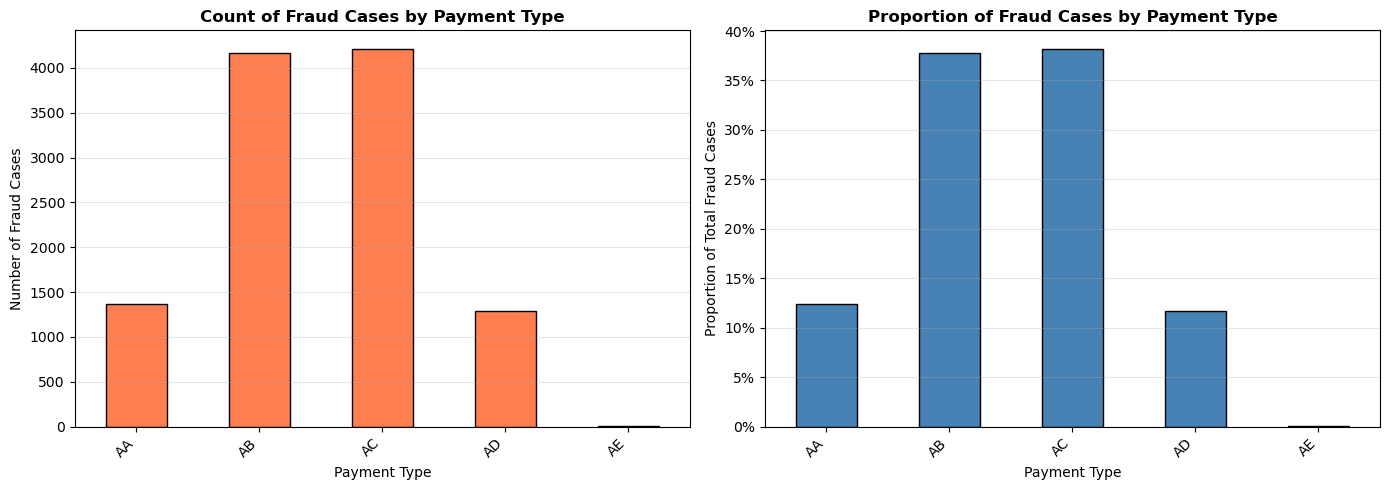


=== Fraud Cases Distribution by Payment Type ===
Payment Type  Count  Proportion  Percentage
          AA   1364    0.123674       12.37
          AB   4169    0.378003       37.80
          AC   4209    0.381630       38.16
          AD   1286    0.116602       11.66
          AE      1    0.000091        0.01

=== Non-Fraud Cases Distribution by Payment Type ===
Payment Type  Count  Proportion  Percentage
          AA 256885    0.259750       25.97
          AB 366385    0.370471       37.05
          AC 247862    0.250626       25.06
          AD 117551    0.118862       11.89
          AE    288    0.000291        0.03


In [16]:
# Filter for fraud cases only (fraud_bool==1)
fraud_cases = dataset[dataset['fraud_bool'] == 1]
non_fraud_cases = dataset[dataset['fraud_bool'] == 0]
# Count fraud cases in each days_since_request_binned category
fraud_by_bin_payment_type = fraud_cases['payment_type'].value_counts().sort_index()
non_fraud_by_bin_payment_type = non_fraud_cases['payment_type'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_payment_type = fraud_by_bin_payment_type / fraud_by_bin_payment_type.sum()
non_fraud_by_bin_of_payment_type_proportions = non_fraud_by_bin_payment_type / non_fraud_by_bin_payment_type.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_payment_type.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by Payment Type', fontsize=12, fontweight='bold')
ax1.set_xlabel('Payment Type')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_payment_type.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Payment Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Payment Type')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by Payment Type ===")
summary_df_fraud_by_payment_type = pd.DataFrame({
    'Payment Type': fraud_by_bin_payment_type.index,
    'Count': fraud_by_bin_payment_type.values,
    'Proportion': fraud_proportions_by_bin_of_payment_type.values,
    'Percentage': (fraud_proportions_by_bin_of_payment_type.values * 100).round(2)
})
print(summary_df_fraud_by_payment_type.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Payment Type ===")
summary_df_non_fraud_by_payment_type = pd.DataFrame({
    'Payment Type': non_fraud_by_bin_payment_type.index,
    'Count': non_fraud_by_bin_payment_type.values,
    'Proportion': non_fraud_by_bin_of_payment_type_proportions.values,
    'Percentage': (non_fraud_by_bin_of_payment_type_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_payment_type.to_string(index=False))

**Slight** difference in AA, AC Cases since in AA type the fraud detection rate seems to be half of non-fraud corresponding rate and vice versa of AC. The remaining cases are having same influence ==> need to aggregate the cases in other categories.

In [17]:
# We want to create payment_type_engineered including only classes of AA, AC and all other ones to be grouped as 'Other'
def engineer_payment_type(row):
    if row['payment_type'] in ['AA', 'AC']:
        return row['payment_type']
    else:
        return 'Other'
dataset['payment_type_engineered'] = dataset.apply(engineer_payment_type, axis=1)

### employment_status

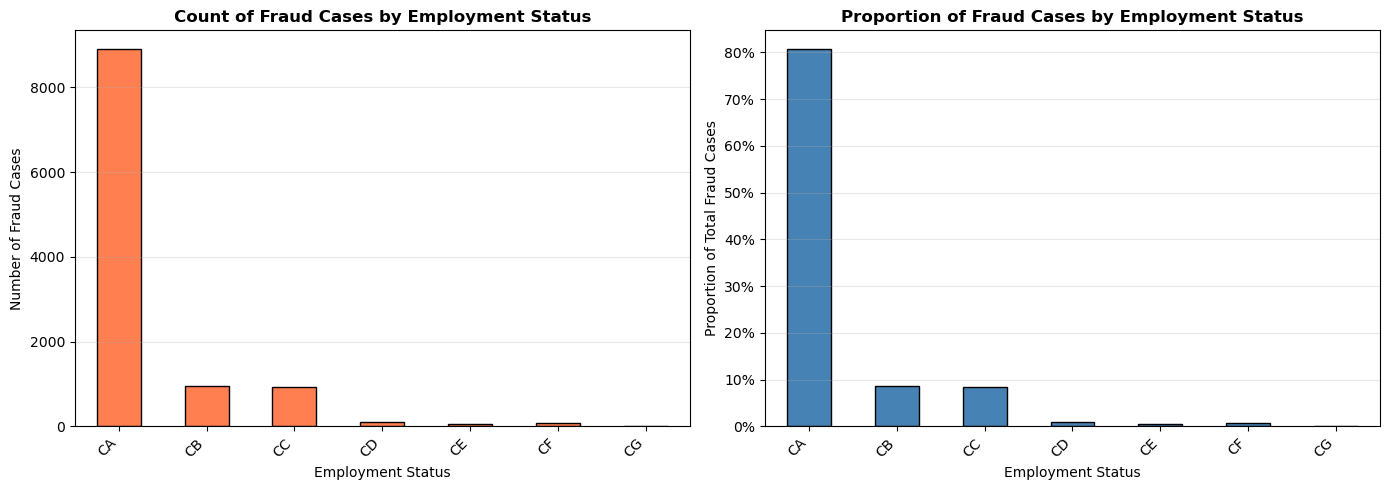


=== Fraud Cases Distribution by Employment Status ===
Employment Status  Count  Proportion  Percentage
               CA   8899    0.806873       80.69
               CB    953    0.086409        8.64
               CC    932    0.084504        8.45
               CD    100    0.009067        0.91
               CE     53    0.004806        0.48
               CF     85    0.007707        0.77
               CG      7    0.000635        0.06

=== Non-Fraud Cases Distribution by Employment Status ===
Employment Status  Count  Proportion  Percentage
               CA 721353    0.729398       72.94
               CB 137335    0.138867       13.89
               CC  36826    0.037237        3.72
               CD  26422    0.026717        2.67
               CE  22640    0.022892        2.29
               CF  43949    0.044439        4.44
               CG    446    0.000451        0.05


In [18]:

# Count fraud cases in each days_since_request_binned category
fraud_by_bin_employment_status = fraud_cases['employment_status'].value_counts().sort_index()
non_fraud_by_bin_employment_status = non_fraud_cases['employment_status'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_employment_status = fraud_by_bin_employment_status / fraud_by_bin_employment_status.sum()
non_fraud_by_bin_of_employment_status_proportions = non_fraud_by_bin_employment_status / non_fraud_by_bin_employment_status.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_employment_status.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by Employment Status', fontsize=12, fontweight='bold')
ax1.set_xlabel('Employment Status')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_employment_status.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by Employment Status', fontsize=12, fontweight='bold')
ax2.set_xlabel('Employment Status')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by Employment Status ===")
summary_df_fraud_by_employment_status = pd.DataFrame({
    'Employment Status': fraud_by_bin_employment_status.index,
    'Count': fraud_by_bin_employment_status.values,
    'Proportion': fraud_proportions_by_bin_of_employment_status.values,
    'Percentage': (fraud_proportions_by_bin_of_employment_status.values * 100).round(2)
})
print(summary_df_fraud_by_employment_status.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by Employment Status ===")
summary_df_non_fraud_by_employment_status = pd.DataFrame({
    'Employment Status': non_fraud_by_bin_employment_status.index,
    'Count': non_fraud_by_bin_employment_status.values,
    'Proportion': non_fraud_by_bin_of_employment_status_proportions.values,
    'Percentage': (non_fraud_by_bin_of_employment_status_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_employment_status.to_string(index=False))


In [19]:

# Visualise through stacked barchart the relative proportions of fraud (1 or 0) per employment_status. In essence, we want to see how the cases of fraud are distributed (in terms of proportins) per class and how the non-fraud cases are distributed per class.
employment_status_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
employment_status_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['employment_status'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['employment_status'].value_counts()  
fraud_proportions = fraud_counts / employment_status_counts_fraud
non_fraud_proportions = non_fraud_counts / employment_status_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)


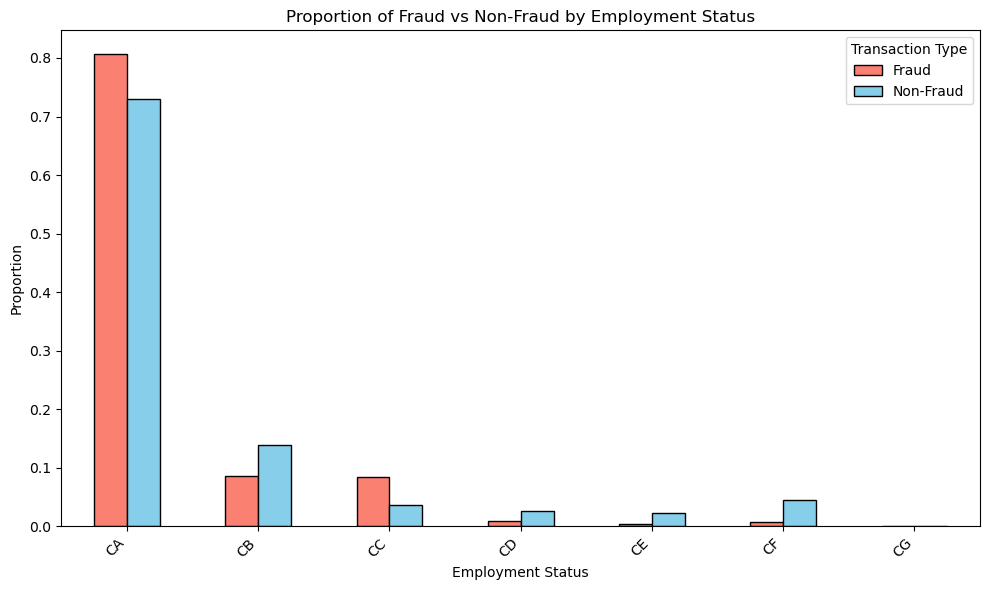

In [20]:
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

Apart from class **CG**, in the other ones the proportion of fraud vs non fraud differentiates=> indication that this is strong factor.

### email_is_free

In [21]:
dataset.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards_binary,bank_months_count_binary,prev_address_months_count_binary,current_address_months_count_binary,customer_profile,phone_home_valid_binary,phone_mobile_valid_binary,phone_home_mobile_valid,days_since_request_binned,payment_type_engineered
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,no_card_holder,financial_credibility,no_previous_address_available,current_address_available,no_card_holder_financial_credibility_no_previo...,invalid_home,valid_mobile,invalid_home_valid_mobile,Recent,AA
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,no_card_holder,financial_credibility,no_previous_address_available,current_address_available,no_card_holder_financial_credibility_no_previo...,valid_home,valid_mobile,valid_home_valid_mobile,Recent,Other


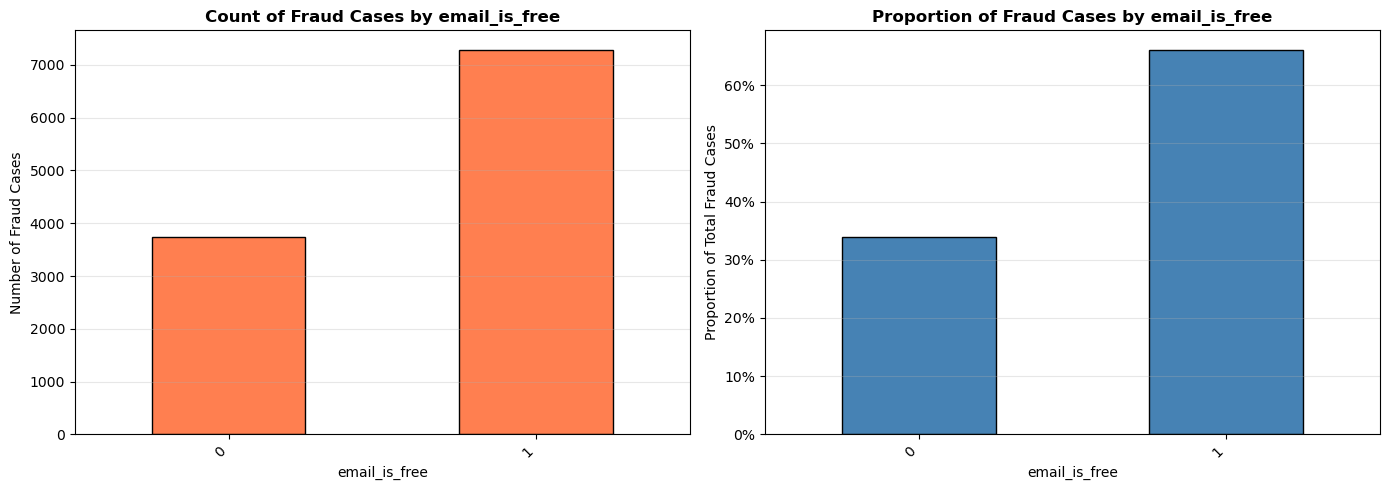


=== Fraud Cases Distribution by email_is_free ===
 email_is_free  Count  Proportion  Percentage
             0   3738    0.338925       33.89
             1   7291    0.661075       66.11

=== Non-Fraud Cases Distribution by email_is_free ===
 email_is_free  Count  Proportion  Percentage
             0 466376    0.471577       47.16
             1 522595    0.528423       52.84


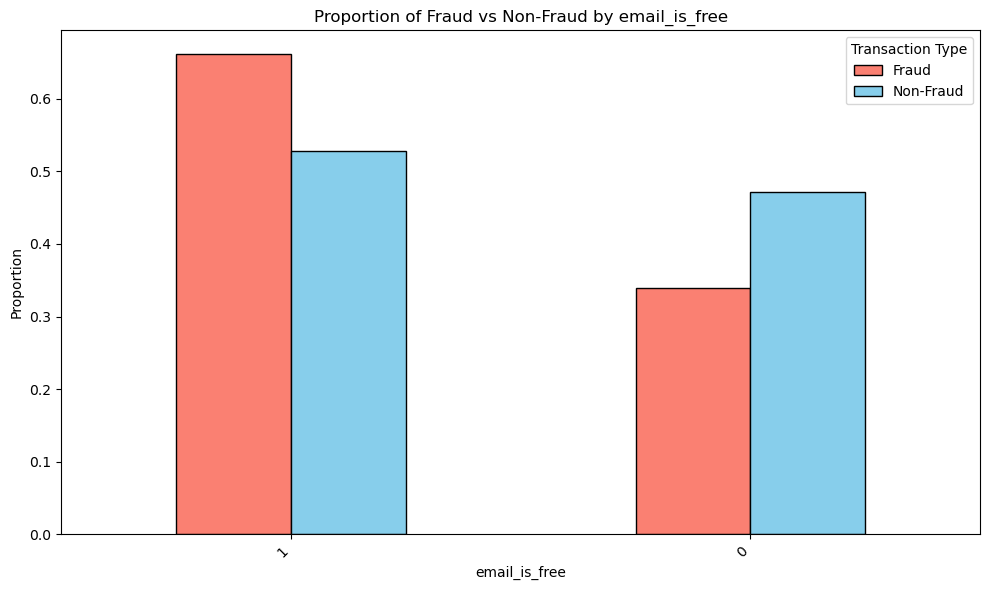

In [22]:

# Count fraud cases in each days_since_request_binned category
fraud_by_bin_email_is_free = fraud_cases['email_is_free'].value_counts().sort_index()
non_fraud_by_bin_email_is_free = non_fraud_cases['email_is_free'].value_counts().sort_index()
# Calculate proportions relative to total fraud cases
fraud_proportions_by_bin_of_email_is_free = fraud_by_bin_email_is_free / fraud_by_bin_email_is_free.sum()
non_fraud_by_bin_of_email_is_free_proportions = non_fraud_by_bin_email_is_free / non_fraud_by_bin_email_is_free.sum()
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of fraud cases by bin
fraud_by_bin_email_is_free.plot(kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Count of Fraud Cases by email_is_free', fontsize=12, fontweight='bold')
ax1.set_xlabel('email_is_free')
ax1.set_ylabel('Number of Fraud Cases')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Proportion of fraud cases by bin
fraud_proportions_by_bin_of_email_is_free.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='black')
ax2.set_title('Proportion of Fraud Cases by email_is_free', fontsize=12, fontweight='bold')
ax2.set_xlabel('email_is_free')
ax2.set_ylabel('Proportion of Total Fraud Cases')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("\n=== Fraud Cases Distribution by email_is_free ===")
summary_df_fraud_by_email_is_free = pd.DataFrame({
    'email_is_free': fraud_by_bin_email_is_free.index,
    'Count': fraud_by_bin_email_is_free.values,
    'Proportion': fraud_proportions_by_bin_of_email_is_free.values,
    'Percentage': (fraud_proportions_by_bin_of_email_is_free.values * 100).round(2)
})
print(summary_df_fraud_by_email_is_free.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by email_is_free ===")
summary_df_non_fraud_by_email_is_free = pd.DataFrame({
    'email_is_free': non_fraud_by_bin_email_is_free.index,
    'Count': non_fraud_by_bin_email_is_free.values,
    'Proportion': non_fraud_by_bin_of_email_is_free_proportions.values,
    'Percentage': (non_fraud_by_bin_of_email_is_free_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_email_is_free.to_string(index=False))
# Visualise through stacked barchart the relative proportions of fraud (1 or 0) per email_is_free. In essence, we want to see how the cases of fraud are distributed (in terms of proportins) per class and how the non-fraud cases are distributed per class.
email_is_free_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
email_is_free_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['email_is_free'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['email_is_free'].value_counts()  
fraud_proportions = fraud_counts / email_is_free_counts_fraud
non_fraud_proportions = non_fraud_counts / email_is_free_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by email_is_free')
plt.xlabel('email_is_free')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

**Inference** The users with paid e-mails tend to be more credible customers (non fraud cases). Among valid customers, there is no strong separation between paid and free emails.

### housing_status

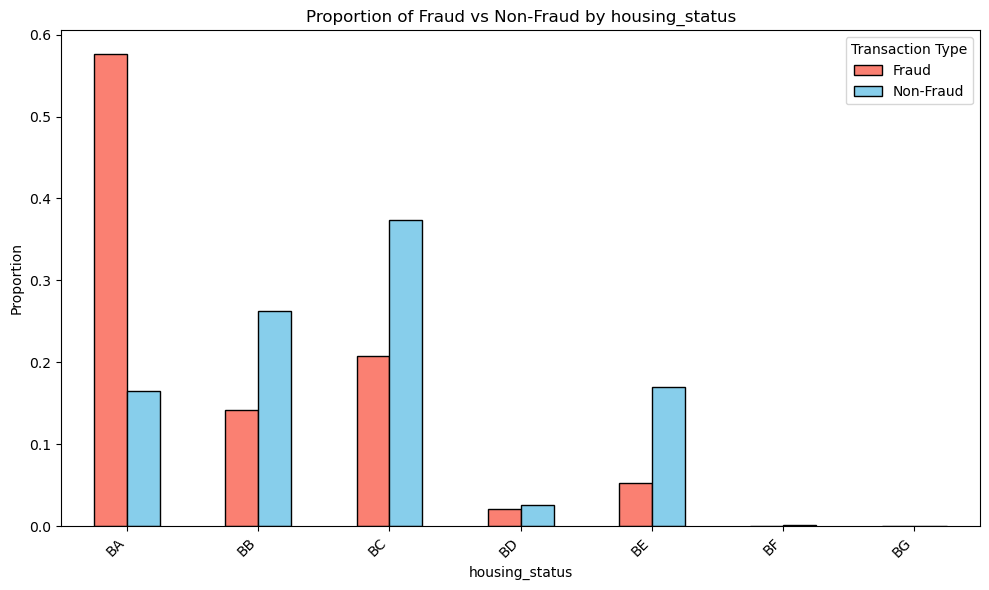


=== Fraud Cases Distribution by housing_status ===
housing_status  Count  Proportion  Percentage
            BA   6357    0.576390       57.64
            BC   2288    0.207453       20.75
            BB   1568    0.142171       14.22
            BE    582    0.052770        5.28
            BD    226    0.020491        2.05
            BF      7    0.000635        0.06
            BG      1    0.000091        0.01

=== Non-Fraud Cases Distribution by housing_status ===
housing_status  Count  Proportion  Percentage
            BC 369855    0.373980       37.40
            BB 259397    0.262290       26.23
            BE 168553    0.170433       17.04
            BA 163318    0.165139       16.51
            BD  25935    0.026224        2.62
            BF   1662    0.001681        0.17
            BG    251    0.000254        0.03


In [ ]:
housing_status_engineered_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
housing_status_engineered_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['housing_status_engineered'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['housing_status_engineered'].value_counts()  
fraud_proportions = fraud_counts / housing_status_engineered_counts_fraud
non_fraud_proportions = non_fraud_counts / housing_status_engineered_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by housing_status_engineered')
plt.xlabel('housing_status_engineered')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by housing_status_engineered ===")
summary_df_fraud_by_housing_status = pd.DataFrame({
    'housing_status_engineered': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_housing_status.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by housing_status_engineered ===")
summary_df_non_fraud_by_housing_status = pd.DataFrame({
    'housing_status_engineered': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_housing_status.to_string(index=False))

### Phone_home_valid, phone_mobile_valid and their_interaction

In [25]:
dataset['phone_home_mobile_valid'].value_counts()

phone_home_mobile_valid
invalid_home_valid_mobile      560691
valid_home_valid_mobile        328985
valid_home_invalid_mobile       88092
invalid_home_invalid_mobile     22232
Name: count, dtype: int64

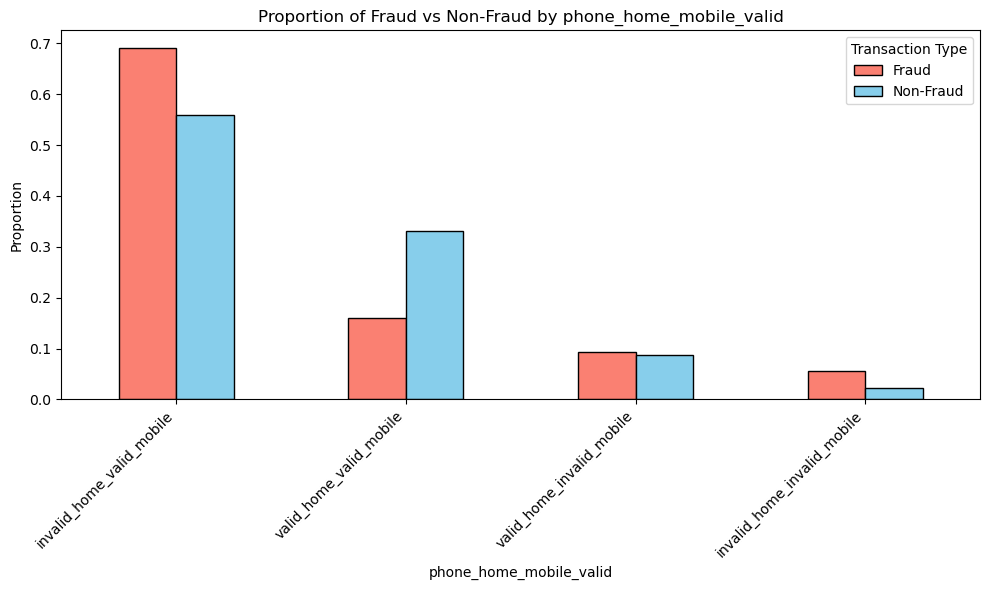


=== Fraud Cases Distribution by phone_home_mobile_valid ===
    phone_home_mobile_valid  Count  Proportion  Percentage
  invalid_home_valid_mobile   7619    0.690815       69.08
    valid_home_valid_mobile   1762    0.159761       15.98
  valid_home_invalid_mobile   1029    0.093299        9.33
invalid_home_invalid_mobile    619    0.056125        5.61

=== Non-Fraud Cases Distribution by phone_home_mobile_valid ===
    phone_home_mobile_valid  Count  Proportion  Percentage
  invalid_home_valid_mobile 553072    0.559240       55.92
    valid_home_valid_mobile 327223    0.330872       33.09
  valid_home_invalid_mobile  87063    0.088034        8.80
invalid_home_invalid_mobile  21613    0.021854        2.19


In [ ]:
phone_home_mobile_valid_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
phone_home_mobile_valid_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['phone_home_mobile_valid'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['phone_home_mobile_valid'].value_counts()  
fraud_proportions = fraud_counts / phone_home_mobile_valid_counts_fraud
non_fraud_proportions = non_fraud_counts / phone_home_mobile_valid_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by phone_home_mobile_valid')
plt.xlabel('phone_home_mobile_valid')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by phone_home_mobile_valid ===")
summary_df_fraud_by_phone_home_mobile_valid = pd.DataFrame({
    'phone_home_mobile_valid': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_phone_home_mobile_valid.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by phone_home_mobile_valid ===")
summary_df_non_fraud_by_phone_home_mobile_valid = pd.DataFrame({
    'phone_home_mobile_valid': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_phone_home_mobile_valid.to_string(index=False))

**Inference**: All cases with either/both invalid home or/and mobile are showing favoritism to fraud. **Important factor**.

### foreign_request

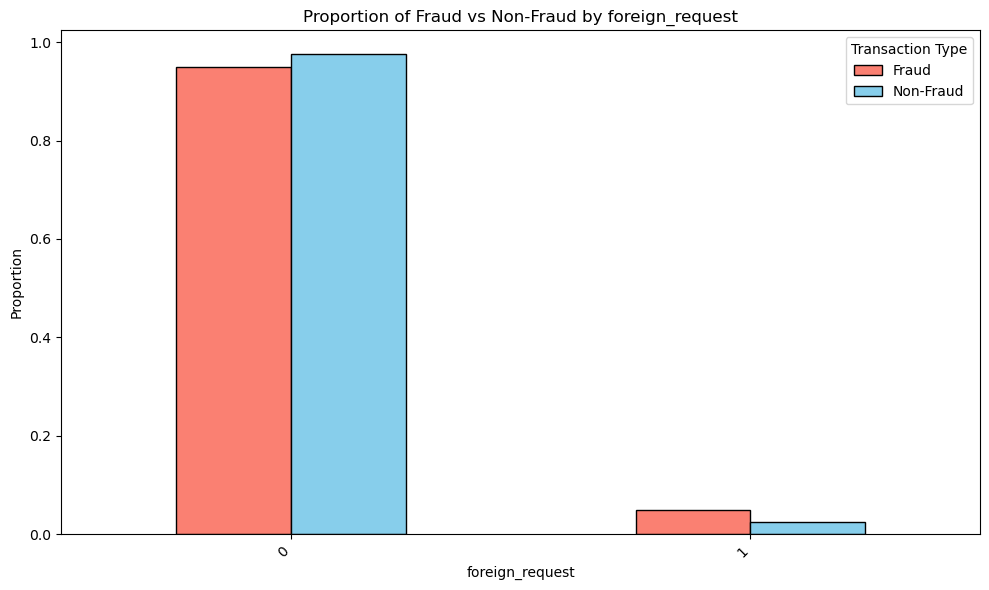


=== Fraud Cases Distribution by foreign_request ===
 foreign_request  Count  Proportion  Percentage
               0  10474    0.949678       94.97
               1    555    0.050322        5.03

=== Non-Fraud Cases Distribution by foreign_request ===
 foreign_request  Count  Proportion  Percentage
               0 964284    0.975038        97.5
               1  24687    0.024962         2.5


In [27]:
foreign_request_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
foreign_request_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['foreign_request'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['foreign_request'].value_counts()  
fraud_proportions = fraud_counts / foreign_request_counts_fraud
non_fraud_proportions = non_fraud_counts / foreign_request_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by foreign_request')
plt.xlabel('foreign_request')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by foreign_request ===")
summary_df_fraud_by_foreign_request = pd.DataFrame({
    'foreign_request': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_foreign_request.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by foreign_request ===")
summary_df_non_fraud_by_foreign_request = pd.DataFrame({
    'foreign_request': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_foreign_request.to_string(index=False))

**Not so important reason** Little more fraud rate in foreign requests vs the non fraud requests. But not something very important.

### source

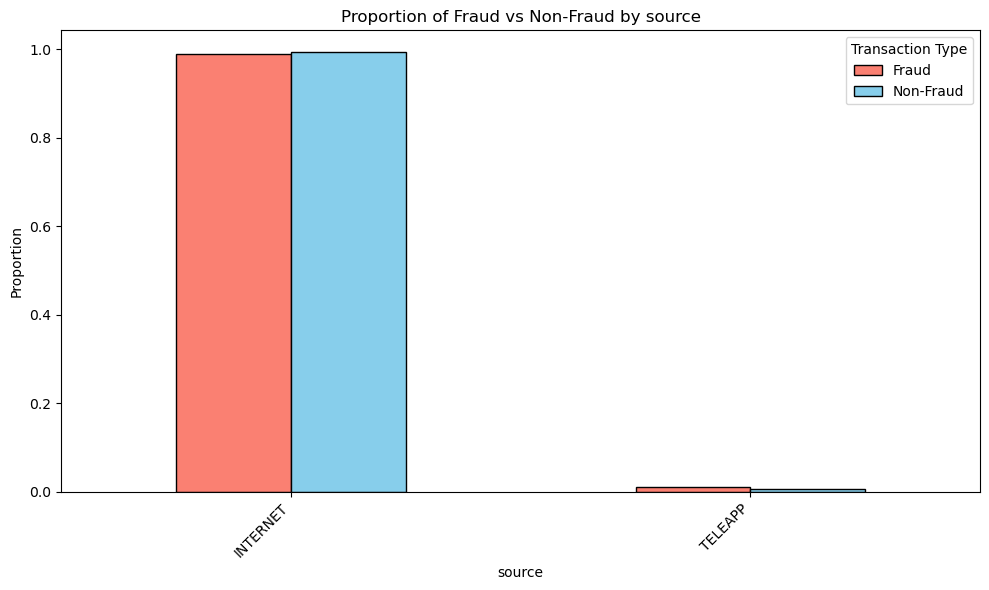


=== Fraud Cases Distribution by source ===
  source  Count  Proportion  Percentage
INTERNET  10917    0.989845       98.98
 TELEAPP    112    0.010155        1.02

=== Non-Fraud Cases Distribution by source ===
  source  Count  Proportion  Percentage
INTERNET 982035    0.992987        99.3
 TELEAPP   6936    0.007013         0.7


In [28]:
source_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
source_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['source'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['source'].value_counts()  
fraud_proportions = fraud_counts / source_counts_fraud
non_fraud_proportions = non_fraud_counts / source_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by source')
plt.xlabel('source')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by source ===")
summary_df_fraud_by_source = pd.DataFrame({
    'source': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_source.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by source ===")
summary_df_non_fraud_by_source = pd.DataFrame({
    'source': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_source.to_string(index=False))

**Not important factor the source**

### device_os

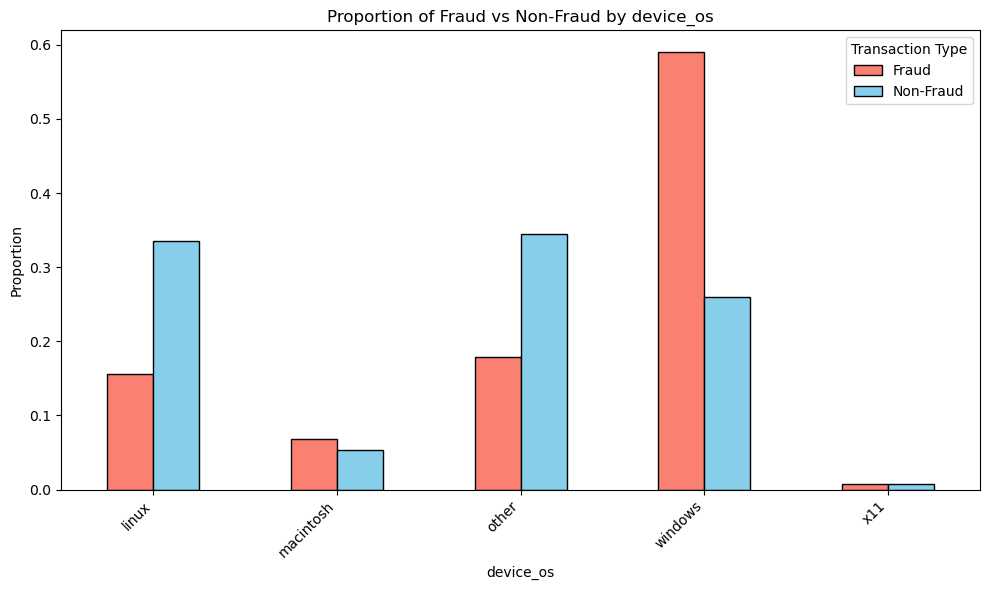


=== Fraud Cases Distribution by device_os ===
device_os  Count  Proportion  Percentage
  windows   6507    0.589990       59.00
    other   1974    0.178983       17.90
    linux   1715    0.155499       15.55
macintosh    752    0.068184        6.82
      x11     81    0.007344        0.73

=== Non-Fraud Cases Distribution by device_os ===
device_os  Count  Proportion  Percentage
    other 340754    0.344554       34.46
    linux 330997    0.334688       33.47
  windows 256999    0.259865       25.99
macintosh  53074    0.053666        5.37
      x11   7147    0.007227        0.72


In [29]:
device_os_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
device_os_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['device_os'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['device_os'].value_counts()  
fraud_proportions = fraud_counts / device_os_counts_fraud
non_fraud_proportions = non_fraud_counts / device_os_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by device_os')
plt.xlabel('device_os')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by device_os ===")
summary_df_fraud_by_device_os = pd.DataFrame({
    'device_os': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_device_os.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by device_os ===")
summary_df_non_fraud_by_device_os = pd.DataFrame({
    'device_os': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_device_os.to_string(index=False))

**Inference** Fraud users tend to use more windows than non fraud while linux users tend to have less fraud which may be due to the closed-source of linux, macintosh.

In [30]:
# Create an engineered feature "device_os_engineered" where we group macintosh and x11 as 'Other' and keep the rest as is.
def engineer_device_os(row):
    if row['device_os'] in ['macintosh', 'x11']:
        return 'Other'
    else:
        return row['device_os']
dataset['device_os_engineered'] = dataset.apply(engineer_device_os, axis=1)

### keep_alive_session

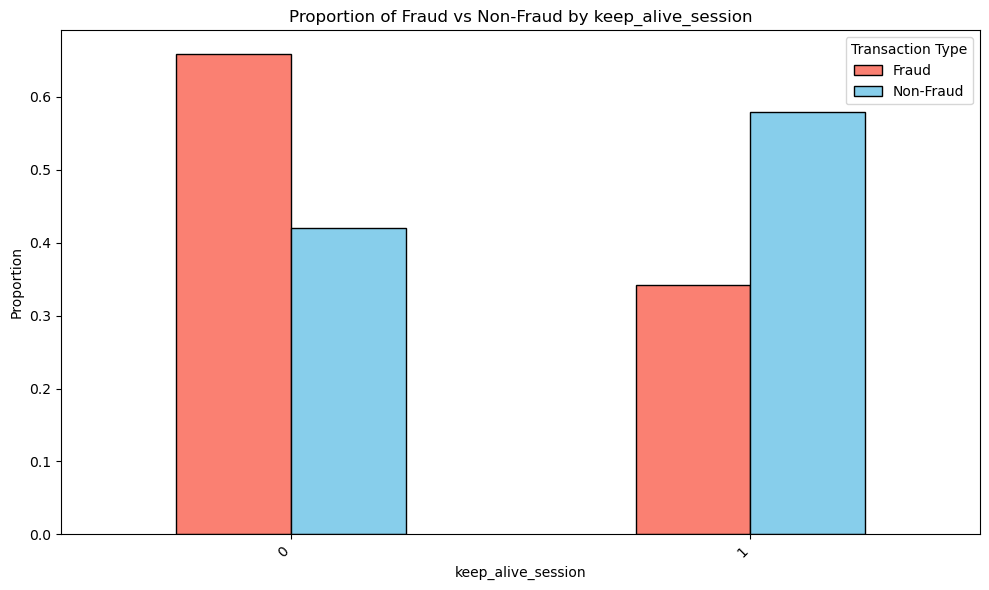


=== Fraud Cases Distribution by keep_alive_session ===
 keep_alive_session  Count  Proportion  Percentage
                  0   7261    0.658355       65.84
                  1   3768    0.341645       34.16

=== Non-Fraud Cases Distribution by keep_alive_session ===
 keep_alive_session  Count  Proportion  Percentage
                  1 573179    0.579571       57.96
                  0 415792    0.420429       42.04


In [31]:
keep_alive_session_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
keep_alive_session_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['keep_alive_session'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['keep_alive_session'].value_counts()  
fraud_proportions = fraud_counts / keep_alive_session_counts_fraud
non_fraud_proportions = non_fraud_counts / keep_alive_session_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by keep_alive_session')
plt.xlabel('keep_alive_session')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by keep_alive_session ===")
summary_df_fraud_by_keep_alive_session = pd.DataFrame({
    'keep_alive_session': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_keep_alive_session.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by keep_alive_session ===")
summary_df_non_fraud_by_keep_alive_session = pd.DataFrame({
    'keep_alive_session': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_keep_alive_session.to_string(index=False))

**Slight** effect since among fraud users we observe that the majority is users without live session.

### device_distinct_emails_8w

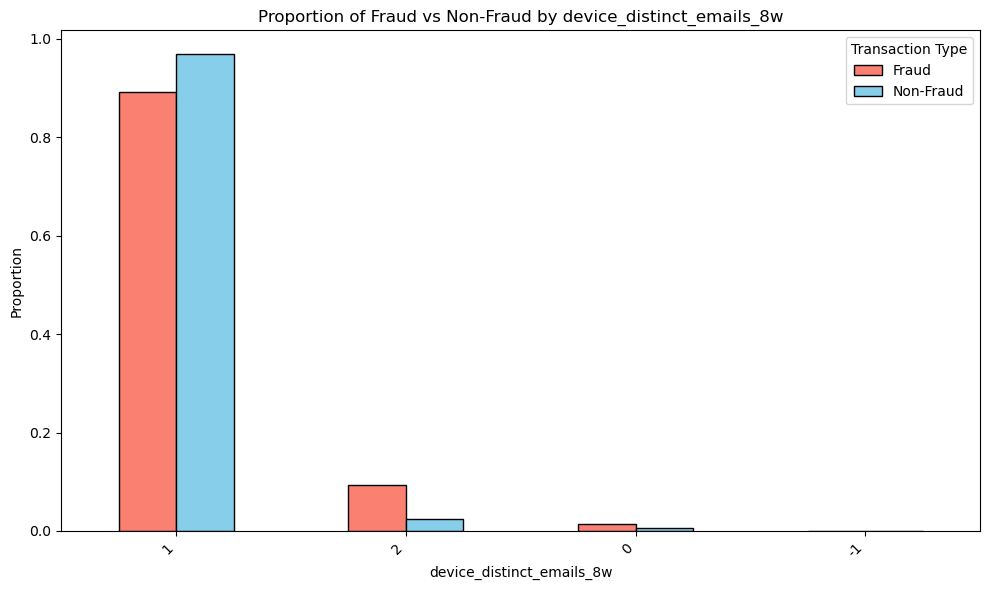


=== Fraud Cases Distribution by device_distinct_emails_8w ===
 device_distinct_emails_8w  Count  Proportion  Percentage
                         1   9839    0.892103       89.21
                         2   1035    0.093844        9.38
                         0    151    0.013691        1.37
                        -1      4    0.000363        0.04

=== Non-Fraud Cases Distribution by device_distinct_emails_8w ===
 device_distinct_emails_8w  Count  Proportion  Percentage
                         1 958228    0.968914       96.89
                         2  24267    0.024538        2.45
                         0   6121    0.006189        0.62
                        -1    355    0.000359        0.04


In [32]:
device_distinct_emails_8w_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
device_distinct_emails_8w_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['device_distinct_emails_8w'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['device_distinct_emails_8w'].value_counts()  
fraud_proportions = fraud_counts / device_distinct_emails_8w_counts_fraud
non_fraud_proportions = non_fraud_counts / device_distinct_emails_8w_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Now plot the stacked bar chart the proportions_df
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by device_distinct_emails_8w')
plt.xlabel('device_distinct_emails_8w')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by device_distinct_emails_8w ===")
summary_df_fraud_by_device_distinct_emails_8w = pd.DataFrame({
    'device_distinct_emails_8w': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_device_distinct_emails_8w.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by device_distinct_emails_8w ===")
summary_df_non_fraud_by_device_distinct_emails_8w = pd.DataFrame({
    'device_distinct_emails_8w': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_device_distinct_emails_8w.to_string(index=False))

**Slight** indication that between fraud and non-fraud users, the fraud users indicate that when they use 2 distinct emails more chances to be fraud while for <2 e-mails more non-fraud cases.

### month

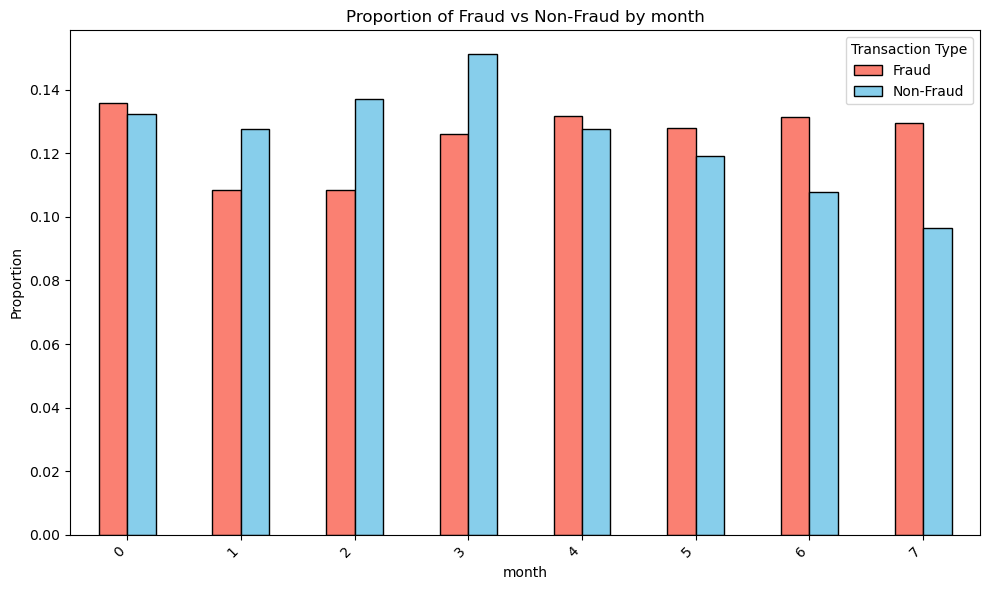


=== Fraud Cases Distribution by month ===
 month  Count  Proportion  Percentage
     0   1500    0.136005       13.60
     4   1452    0.131653       13.17
     6   1450    0.131472       13.15
     7   1428    0.129477       12.95
     5   1411    0.127935       12.79
     3   1392    0.126213       12.62
     2   1198    0.108623       10.86
     1   1198    0.108623       10.86

=== Non-Fraud Cases Distribution by month ===
 month  Count  Proportion  Percentage
     3 149544    0.151212       15.12
     2 135781    0.137295       13.73
     0 130940    0.132400       13.24
     1 126422    0.127832       12.78
     4 126239    0.127647       12.76
     5 117912    0.119227       11.92
     6 106718    0.107908       10.79
     7  95415    0.096479        9.65


In [33]:
month_counts_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
month_counts_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['month'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['month'].value_counts()  
fraud_proportions = fraud_counts / month_counts_fraud
non_fraud_proportions = non_fraud_counts / month_counts_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for month (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by month')
plt.xlabel('month')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by month ===")
summary_df_fraud_by_month = pd.DataFrame({
    'month': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_month.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by month ===")
summary_df_non_fraud_by_month = pd.DataFrame({
    'month': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_month.to_string(index=False))

**Not** important relatnshiop apart from the fact that after 4th month, it seems that fraud rates were increased concerning fraud users.

### customer_profile

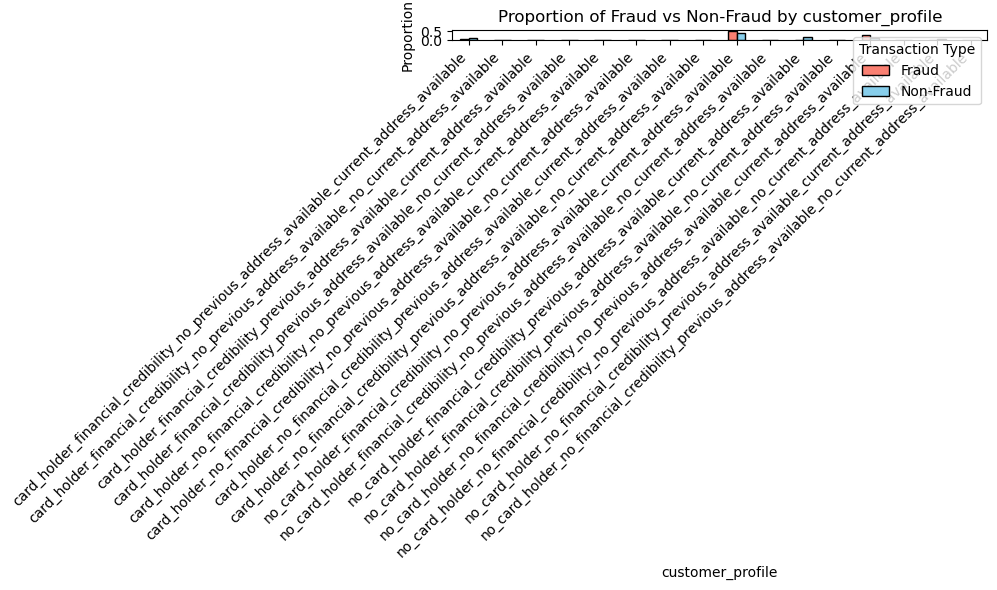


=== Fraud Cases Distribution by customer_profile ===
                                                                               customer_profile  Count  Proportion  Percentage
   no_card_holder_financial_credibility_no_previous_address_available_current_address_available   5849    0.530329       53.03
no_card_holder_no_financial_credibility_no_previous_address_available_current_address_available   3417    0.309820       30.98
      card_holder_financial_credibility_no_previous_address_available_current_address_available    556    0.050413        5.04
      no_card_holder_financial_credibility_previous_address_available_current_address_available    439    0.039804        3.98
   no_card_holder_no_financial_credibility_previous_address_available_current_address_available    379    0.034364        3.44
   card_holder_no_financial_credibility_no_previous_address_available_current_address_available    312    0.028289        2.83
         card_holder_financial_credibility_previous_addre

In [34]:
customer_profile_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
customer_profile_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['customer_profile'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['customer_profile'].value_counts()  
fraud_proportions = fraud_counts / customer_profile_fraud
non_fraud_proportions = non_fraud_counts / customer_profile_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for customer_profile (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by customer_profile')
plt.xlabel('customer_profile')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by customer_profile ===")
summary_df_fraud_by_customer_profile = pd.DataFrame({
    'customer_profile': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_customer_profile.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by customer_profile ===")
summary_df_non_fraud_by_customer_profile = pd.DataFrame({
    'customer_profile': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_customer_profile.to_string(index=False))

In [35]:
customer_profile_v2_fraud = dataset.loc[dataset['fraud_bool'] == 1].shape[0]
customer_profile_v2_non_fraud = dataset.loc[dataset['fraud_bool'] == 0].shape[0]
fraud_counts = dataset[dataset['fraud_bool'] == 1]['customer_profile_v2'].value_counts()
non_fraud_counts = dataset[dataset['fraud_bool'] == 0]['customer_profile_v2'].value_counts()  
fraud_proportions = fraud_counts / customer_profile_v2_fraud
non_fraud_proportions = non_fraud_counts / customer_profile_v2_non_fraud
proportions_df = pd.DataFrame({
    'Fraud': fraud_proportions,
    'Non-Fraud': non_fraud_proportions
}).fillna(0)
# Example for customer_profile_v2 (lines 914-921):
proportions_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['salmon', 'skyblue'], edgecolor='black')
plt.title('Proportion of Fraud vs Non-Fraud by customer_profile_v2')
plt.xlabel('customer_profile_v2')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type', loc='upper right', labels=['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()
# Table with results
# Print summary table
print("\n=== Fraud Cases Distribution by customer_profile_v2 ===")
summary_df_fraud_by_customer_profile_v2 = pd.DataFrame({
    'customer_profile_v2': fraud_counts.index,
    'Count': fraud_counts.values,
    'Proportion': fraud_proportions.values,
    'Percentage': (fraud_proportions.values * 100).round(2)
})  
print(summary_df_fraud_by_customer_profile_v2.to_string(index=False))

# Print summary table
print("\n=== Non-Fraud Cases Distribution by customer_profile_v2 ===")
summary_df_non_fraud_by_customer_profile_v2 = pd.DataFrame({
    'customer_profile_v2': non_fraud_counts.index,
    'Count': non_fraud_counts.values,
    'Proportion': non_fraud_proportions.values,
    'Percentage': (non_fraud_proportions.values * 100).round(2)
})      

print(summary_df_non_fraud_by_customer_profile_v2.to_string(index=False))

KeyError: 'customer_profile_v2'

In [56]:
dataset.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,prev_address_months_count_binary,current_address_months_count_binary,customer_profile,phone_home_valid_binary,phone_mobile_valid_binary,phone_home_mobile_valid,days_since_request_binned,payment_type_engineered,housing_status_engineered,device_os_engineered
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,no_previous_address_available,current_address_available,no_card_holder_financial_credibility_no_previo...,invalid_home,valid_mobile,invalid_home_valid_mobile,Recent,AA,BC,linux
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,no_previous_address_available,current_address_available,no_card_holder_financial_credibility_no_previo...,valid_home,valid_mobile,valid_home_valid_mobile,Recent,Other,BC,other
